<a href="https://colab.research.google.com/github/ckuwiw74/gasEksplorasiHyperparameterCNNdanNeuralNetwork/blob/main/Klasifikasi_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library

In [ ]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,
      "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


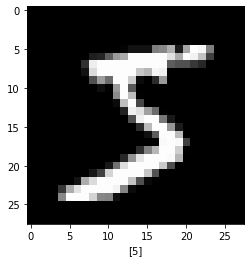

In [ ]:
# Show one of the images from the training dataset
plt.imshow(x_train[0], cmap="gray") # Import the image
plt.xlabel([y_train[0]]) #Add label of the image
plt.show() # Plot the image

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalize the testing dataset

In [ ]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (60, 784)                 0         
                                                                 
 dense_12 (Dense)            (60, 128)                 100480    
                                                                 
 dense_13 (Dense)            (60, 128)                 16512     
                                                                 
 dense_14 (Dense)            (60, 10)                  1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


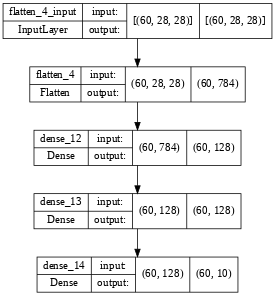

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
#Compling the model using adam optimization algorithm which is used for training Deep NN.
#Penyusunan model menggunakan algoritma optimasi adam yang digunakan untuk pelatihan Deep NN.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Start training process using train data sets
#Mulai proses pelatihan menggunakan dataset
model_log=model.fit(x=x_train, y=y_train, batch_size=60, verbose=1, epochs=5, validation_split=.3)

Epoch 1/5
700/700 [==============================] - 4s 4ms/step - loss: 0.3811 - accuracy: 0.8921 - val_loss: 0.2119 - val_accuracy: 0.9373
Epoch 2/5
700/700 [==============================] - 3s 4ms/step - loss: 0.1603 - accuracy: 0.9510 - val_loss: 0.1597 - val_accuracy: 0.9522
Epoch 3/5
700/700 [==============================] - 3s 4ms/step - loss: 0.1087 - accuracy: 0.9675 - val_loss: 0.1307 - val_accuracy: 0.9589
Epoch 4/5
700/700 [==============================] - 3s 4ms/step - loss: 0.0817 - accuracy: 0.9750 - val_loss: 0.1136 - val_accuracy: 0.9660
Epoch 5/5
700/700 [==============================] - 3s 4ms/step - loss: 0.0628 - accuracy: 0.9799 - val_loss: 0.1188 - val_accuracy: 0.9636


In [ ]:
# Evaluate the model performance
#Evaluasi kinerja model
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9680

Test Accuracy: 0.9679999947547913

Test Loss: 0.10170445591211319


In [ ]:
predictions = model.predict([x_test]) # Make prediction using test data set

In [ ]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

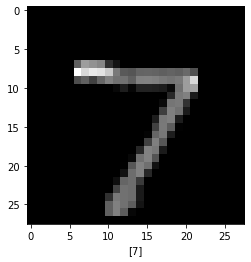

In [ ]:
# Show one of the images from the test dataset
#Tampilkan salah satu gambar dari pengujian dataset
plt.imshow(x_test[0],cmap='gray') #Load the image
plt.xlabel([y_test[0]]) #Add label of the image
plt.show() # Plot the image

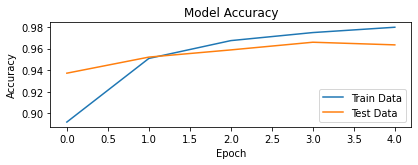

In [ ]:
import os
# plotting the graph for accuracy model
#memplot grafik untuk akurasi model 
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='lower right')
plt.tight_layout()

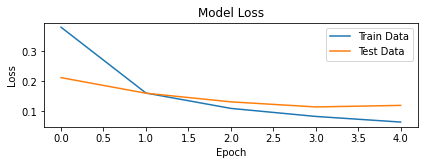

In [ ]:
# plotting the graph for loss model
#memplot grafik untuk loss model 

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='upper right')
plt.tight_layout()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("Predicted Label: {} Accuracy: {:1.0f}% True Label: {}".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)

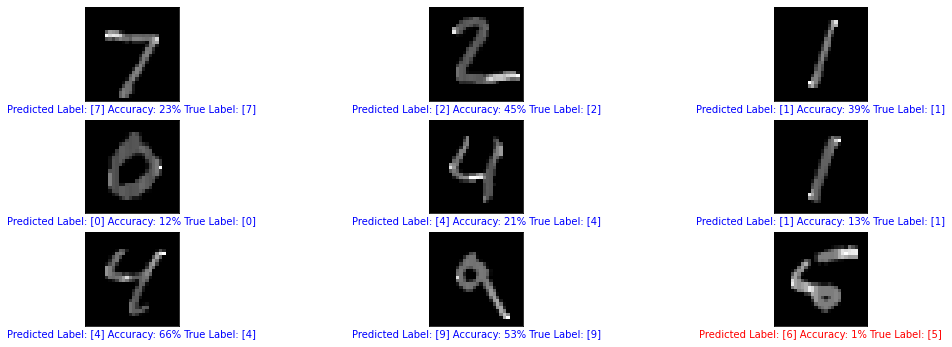

In [ ]:
# assign the number of rows and columns followed with images 
#tetapkan jumlah baris dan kolom yang diikuti oleh gambar
num_rows = 5
num_cols = 3
num_images = 9
plt.figure(figsize=(2*3*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  
plt.show()